In [30]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
madrid = gpd.read_file('Distritos.shp')
cam = gpd.read_file('muni2023.shx')

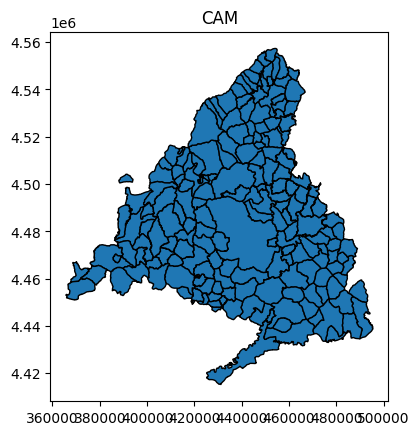

In [32]:
cam.plot(edgecolor='black')
plt.title('CAM')
plt.show()

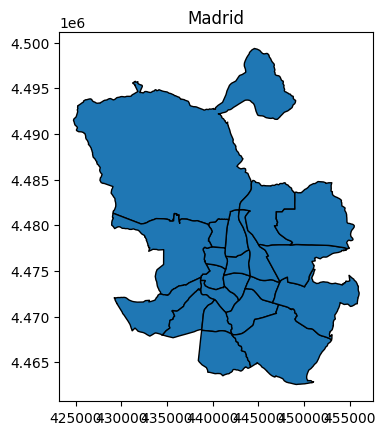

In [33]:
madrid.plot(edgecolor='black')
plt.title('Madrid')
plt.show()

In [34]:
df = pd.read_csv("restaurants_definitivo.csv", index_col=0)
df

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url
id,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...


In [35]:
# Creamos una columna 'geometry' con puntos en latitud/longitud (EPSG:4326)
df['geometry'] = df.apply(lambda row: Point(row['Long'], row['Lat']), axis=1)

In [36]:
# Convertimos a GeoDataFrame con CRS EPSG:4326 (coordenadas geográficas)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

In [37]:
# Transformamos al sistema de coordenadas proyectadas EPSG:25830
gdf = gdf.to_crs("EPSG:25830")
gdf

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,geometry
id,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,POINT (440374.058 4474154.146)
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,POINT (440736.036 4474908.563)
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,POINT (439744.363 4475445.862)
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,POINT (440349.999 4473625.614)
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,POINT (440536.496 4475720.826)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,POINT (425591.093 4473163.192)
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,POINT (425583.754 4473124.855)
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,POINT (454158.033 4469674.139)


In [38]:
madrid["NOMBRE_DISTRITO"] = ["Centro", "Arganzuela", "Retiro", "Salamanca", "Chamartin",
               "Tetuan", "Chamberi", "Fuencarral-El Pardo", "Moncloa-Aravaca",
               "Latina", "Carabanchel", "Usera", "Puente de Vallecas", "Moratalaz",
               "Ciudad Lineal", "Hortaleza", "Villaverde", "Villa de Vallecas",
               "Vicalvaro", "San Blas - Canillejas", "Barajas"]
madrid

,geometry,NOMBRE_DISTRITO
0,"POLYGON ((441184.784 4473200.78, 441181.244 44...",Centro
1,"POLYGON ((440272.919 4472969.567, 440350.318 4...",Arganzuela
2,"POLYGON ((443652.149 4473312.6, 443560.739 447...",Retiro
3,"POLYGON ((444075.178 4476611.827, 444057.808 4...",Salamanca
4,"POLYGON ((442904.114 4481525.212, 442901.02 44...",Chamartin
5,"POLYGON ((440863.995 4480662.221, 440875.945 4...",Tetuan
6,"POLYGON ((441380.014 4477514.037, 441330.993 4...",Chamberi
7,"POLYGON ((445503.158 4498783.075, 445674.188 4...",Fuencarral-El Pardo
8,"POLYGON ((432093.685 4480171.575, 432166.365 4...",Moncloa-Aravaca
9,"POLYGON ((438689.611 4473668.522, 438753.889 4...",Latina


In [39]:
gdf = gdf.to_crs("EPSG:25830")
madrid = madrid.set_crs(epsg=25830)

In [40]:
# Realizar un spatial join para asociar cada punto con su distrito
gdf_resultado = gpd.sjoin(gdf, madrid, how="left", predicate="within")
gdf_resultado

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,geometry,index_right,NOMBRE_DISTRITO
id,,,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,POINT (440374.058 4474154.146),0.0,Centro
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,POINT (440736.036 4474908.563),0.0,Centro
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,POINT (439744.363 4475445.862),0.0,Centro
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,POINT (440349.999 4473625.614),0.0,Centro
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,POINT (440536.496 4475720.826),6.0,Chamberi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,POINT (425591.093 4473163.192),NaN,NaN
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,POINT (425583.754 4473124.855),NaN,NaN
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,POINT (454158.033 4469674.139),NaN,NaN


In [41]:
df_pandas = gdf_resultado.drop(columns=['geometry'])
df_pandas

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,index_right,NOMBRE_DISTRITO
id,,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,0.0,Centro
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,0.0,Centro
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,0.0,Centro
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,0.0,Centro
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,6.0,Chamberi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,NaN,NaN
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,NaN,NaN
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,NaN,NaN


In [42]:
conteo_distritos = df_pandas['NOMBRE_DISTRITO'].value_counts()
conteo_distritos

NOMBRE_DISTRITO
Centro                   379
Chamberi                  69
Salamanca                 65
Arganzuela                34
Tetuan                    21
Retiro                    19
Barajas                   18
Moncloa-Aravaca           17
Chamartin                 13
Latina                    11
San Blas - Canillejas      9
Hortaleza                  9
Fuencarral-El Pardo        8
Ciudad Lineal              8
Puente de Vallecas         8
Villa de Vallecas          5
Usera                      4
Carabanchel                4
Moratalaz                  4
Vicalvaro                  3
Name: count, dtype: int64